# semseg/predict

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import torch
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from roofAI.semseg import Profile
from roofAI.semseg.model import SemSegModel
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
abcli-7.2362.1-unknown, built on 09 October 2023, 18:36:13


In [2]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION
dataset_object = "roofAI-CamVid-v2"
model_object = "roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403"
prediction_object = objects.unique_object("roofAI-CamVid-semseg-prediction")

📂 roofAI-CamVid-semseg-prediction-2023-10-09-18-36-13-21331


In [3]:
model = SemSegModel(
    model_filename=objects.path_of("model.pth", object_name=model_object),
    )

SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth): Profile.VALIDATION
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> car


SemSegModel.predict(/Users/kamangir/storage/abcli/roofAI-CamVid-v2/SegNet-Tutorial/CamVid/) -cpu-> /Users/kamangir/storage/abcli/roofAI-CamVid-semseg-prediction-2023-10-09-18-36-13-21331


Dataset: 1 item(s).
Dataset: 1 item(s).


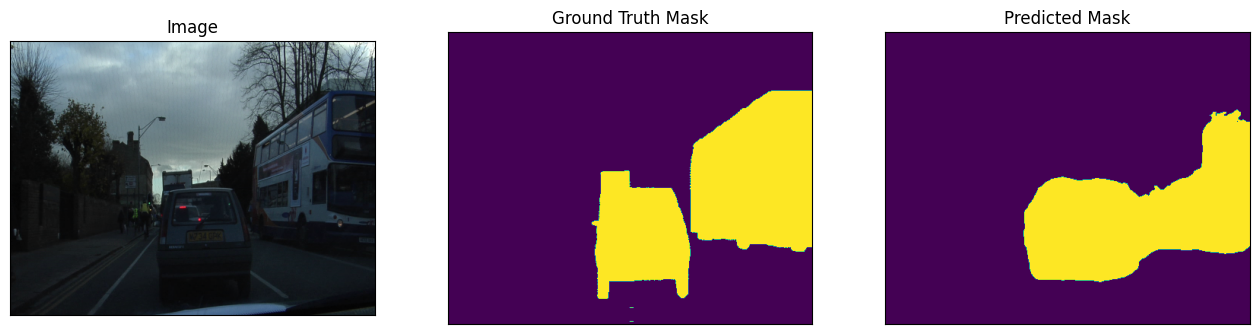

In [4]:
model.predict(dataset_path=objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object
    ),
    output_path=objects.object_path(prediction_object),
    in_notebook=True,
)

In [5]:
%%bash -s $prediction_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

prediction_object=$1

abcli select $prediction_object
abcli tag set . built_by_notebook
# abcli upload

📂 abcli: roofAI-CamVid-semseg-prediction-2023-10-09-18-36-13-21331


roofAI-CamVid-semseg-prediction-2023-10-09-18-36-13-21331 += #built_by_notebook.


In [6]:
seed.log(
    "download_object",
    object_name=prediction_object)

abcli select roofAI-CamVid-semseg-prediction-2023-10-09-18-36-13-21331
abcli download
open .


In [7]:
# END